In [1]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from myheatmap import myheatmap

import matplotlib
print(matplotlib.__version__) # version 3 required for cmap='twilight_shifted'

sns.set_context('poster') # makes text larger

############### Mac vs Windows ##############
#folder = '/Volumes/Aleman-Lab/Group/Projects/GrapheneCoupledResonators/Data/Sample2/2019/2019/08/09/'
folder = r'\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample2\2019\2019\08\09'


3.1.2


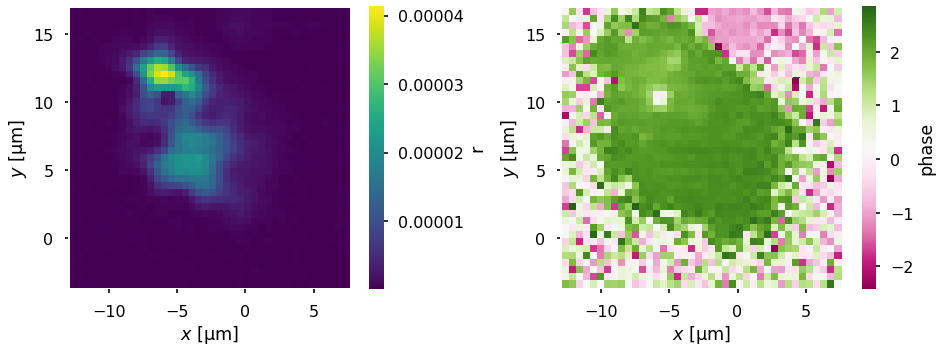

In [2]:
file = 'PosGU01Array01.00r0.5p3Array01.00r0.5p3Device1.2Drum_15.16MHz_1104325' 
path = os.path.join(folder,file)
df = pd.read_csv(os.path.join(path, 'Demod1.csv'), skiprows = 2) 
#df.r = df.r/df.r.max() 
#print(df) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

#plt.suptitle(file + '\n\n');

plt.sca(ax1)
df['rlog'] = np.log10(df.r) 
df['X um']=df['Green X']
df['Y um']= df['Green Y']
amp1 = df.pivot_table(index = 'Y um', columns = 'X um', values = 'r').sort_index(axis = 0, ascending = False) 
myheatmap(amp1, 'r', cmap = 'viridis');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
ax1.axis('equal')


plt.sca(ax2)
df['rlog'] = np.log10(df.r) 
df['X um']=df['Green X']
df['Y um']= df['Green Y']
phase1 = df.pivot_table(index = 'Y um', columns = 'X um', values = 'phase').sort_index(axis = 0, ascending = False) 
myheatmap(phase1, 'phase', cmap='PiYG');
ax2.axis('equal');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
plt.tight_layout();

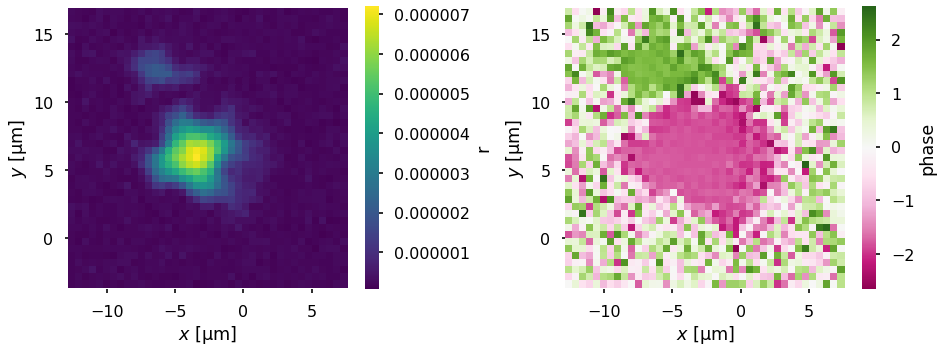

In [3]:
file = 'PosGU01Array01.00r0.5p3Array01.00r0.5p3Device1.2Drum1_15.5MHz105133' 
path = os.path.join(folder,file)
df = pd.read_csv(os.path.join(path, 'Demod1.csv'), skiprows = 2) 
#df.r = df.r/df.r.max() 
#print(df) 


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
df['rlog'] = np.log10(df.r) 
df['X um']=df['Green X']
df['Y um']= df['Green Y']
amp2 = df.pivot_table(index = 'Y um', columns = 'X um', values = 'r').sort_index(axis = 0, ascending = False) 
myheatmap(amp2, 'r', cmap = 'viridis');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
ax1.axis('equal');


#circle1 = plt.Circle((0, 0), 0.2, color='r')
#ax1.add_artist(circle1)

plt.sca(ax2)
df['rlog'] = np.log10(df.r) 
df['X um']=df['Green X']
df['Y um']= df['Green Y']
phase2 = df.pivot_table(index = 'Y um', columns = 'X um', values = 'phase').sort_index(axis = 0, ascending = False) 
myheatmap(phase2, 'phase', cmap='PiYG');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
ax2.axis('equal');

plt.tight_layout();

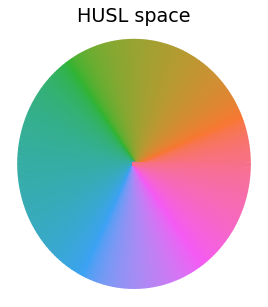

In [4]:
from numpy import sin, cos, pi

n = 314
theta = np.linspace(0, 2 * pi, n)

x = cos(theta)
y = sin(theta)

f = plt.figure(figsize=(10, 5))
with sns.color_palette("husl", n):
    ax = f.add_subplot(121)
    ax.plot([np.zeros_like(x), x], [np.zeros_like(y), y], lw=3)
    ax.set_axis_off()
    ax.set_title("HUSL space")

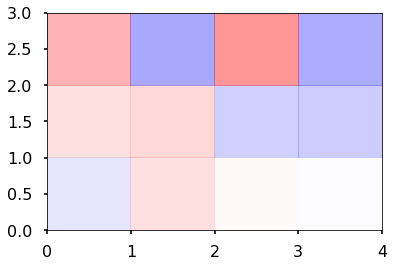

In [5]:
"""
It would be interesting to get the amplitude and phase information on one heatmap, but it does not look easy!
https://stackoverflow.com/questions/24004887/matplotlib-pcolormesh-separate-datacolor-and-color-brightness-information

"""

from matplotlib.colors import LinearSegmentedColormap
data = np.array([[1, 0, 0, 1], 
                 [0, 0, 1, 1], 
                 [0, 1, 0, 1]])
colorInformation = np.array([[0.1, 0.12, 0.02, 0.01], 
                             [0.12, 0.15, 0.18, 0.2], 
                             [0.3, 0.34, 0.41, .32]])
alpha_up=abs(((data*2-1)*colorInformation).max())
alpha_low=abs(((data*2-1)*colorInformation).min())
mid=alpha_low/(alpha_up+alpha_low)
cdict1 = {'red':   ((0.0, 1.0, 1.0),
                   (mid, 1.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.0),
                   (mid, 0.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'alpha':  ((0.0, alpha_low, alpha_low),
                   (mid, 0.0, 0.0),
                   (1.0, alpha_up, alpha_up))
        }
red_blue = LinearSegmentedColormap('red_blue', cdict1)
fig, ax = plt.subplots()
heatmap = ax.pcolormesh((data*2-1)*colorInformation, cmap=red_blue)

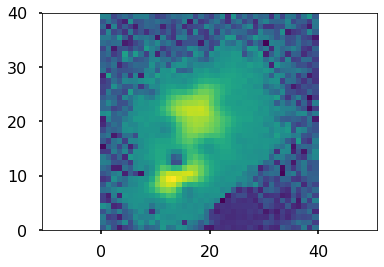

In [6]:
"""
It would be interesting to get the amplitude and phase information on one heatmap, but it does not look easy!
https://stackoverflow.com/questions/24004887/matplotlib-pcolormesh-separate-datacolor-and-color-brightness-information


This did not work.
"""

from matplotlib.colors import LinearSegmentedColormap
data = np.array(phase1)
brightnessinfo = np.array(amp1)


fig, ax = plt.subplots()
heatmap = ax.pcolormesh((data*2-1) *(brightnessinfo+.00001))
ax.axis('equal');